# 2 Gradient Descent for Regression
You have to use Dataset-2 for this experiment. Dataset-2 consists of train, validation, and
test files. The input is a real valued scalar and the output is also a real valued scalar.

1. Fit a linear regression model to this dataset by using stochastic gradient descent. You will do online-SGD (with one example at a time). Use the step size of 1e-6. Compute the MSE on validation set for every epoch. Plot the learning curve i.e. training and validation MSE for every epoch.

In [5]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [6]:
def getdata(filename):
    import csv
    import numpy as np
    with open (filename,'r') as csvfile:
        Dataset_1_test = csv.reader(csvfile)   
        X = []
        Y = []
        for row in Dataset_1_test:
            x = row[0]
            y = row[1]
            X.append(x)
            Y.append(y)   
        
    X = np.array(X).astype(np.float32)
    Y = np.array(Y).astype(np.float32)
    # convert rank 1 array to rank 2 array
    X = np.reshape(X, (-1, 1))
    Y = np.reshape(Y, (-1, 1))
    return X , Y

In [7]:
X_train, Y_train = getdata("F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/hwk1_datasets/Datasets/Dataset_2_train.csv")
print(X_train.shape)
print(Y_train.shape)

X_valid, Y_valid = getdata("F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/hwk1_datasets/Datasets/Dataset_2_valid.csv")
print(X_valid.shape)
print(Y_valid.shape)

(300, 1)
(300, 1)
(100, 1)
(100, 1)


# computer Xm matrix that contains polynomial terms of X

In [8]:
def getfeaturematrix (X,polynomial):
    Xm = []
    for i in range(0,polynomial+1):
        a = np.power(X,i)
        Xm.append(a)
    Xm = np.array(Xm)
    Xm = np.squeeze(Xm, axis=(2,)).T
    return Xm

In [9]:
Xm_train = getfeaturematrix (X_train,1)
feature_no = Xm_train.shape[1]
count_example = Xm_train.shape[0]
print(Xm_train.shape)

Xm_valid = getfeaturematrix (X_valid,1)
print(Xm_valid.shape)

(300, 2)
(100, 2)


# W Computation function

In [10]:
def computeW (learning_rate,Xm,A,W):
    # A = (Hypothesis-Y)
    W = W - learning_rate*(       (A*np.reshape(Xm, (-1, 1)))        )
    return W

In [11]:
def computecost(Hypothesis,Y):
    J = (1/2)*np.mean((Hypothesis-Y)**2) 
    return J

In [12]:
def computeMSE (Hypothesis,Y):
    MSE = np.mean((Hypothesis-Y)**2) 
    return MSE

In [ ]:
#W = np.random.randn(feature_no,1)
#W

In [ ]:
#learning_rate = 1e-06

In [ ]:
#hypothesis = np.dot(W.T,Xm_train[0])
#A = (hypothesis - Y_train[0])
#W = computeW (learning_rate,Xm_train[0],A,W)

In [13]:
def computeEPOCH (count_example,Xm_train,learning_rate,W):
    for i in range(0,count_example):
        hypothesis = np.dot(W.T,Xm_train[i])
        A = (hypothesis - Y_train[i])
        W = computeW (learning_rate,Xm_train[i],A,W)
    
    Hypothesis = np.dot(Xm_train,W)
    J = computecost(Hypothesis,Y_train)
    return J, W
    


In [14]:
W = np.random.randn(feature_no,1)

In [15]:

J_matrix = []
W_matrix = []
MSE_traindata = []
MSE_validdata = []

learning_rate = 1e-6

for i in range (0,10000):

    J , W = computeEPOCH (count_example,Xm_train,learning_rate,W)
    J_matrix.append(J)
    W_matrix.append(W)

    
    Hypothesis_train = np.dot(Xm_train,W)
    Hypothesis_valid = np.dot(Xm_valid,W)
    
    #print( computeMSE (Hypothesis_train,Y_train) )
    
    MSE_traindata = np.append ( MSE_traindata, computeMSE (Hypothesis_train,Y_train) )
    MSE_validdata = np.append ( MSE_validdata, computeMSE (Hypothesis_valid,Y_valid) )

In [16]:
MSE_traindata

array([47.73568856, 47.68844191, 47.64124216, ...,  0.1213293 ,
        0.12132552,  0.12132173])

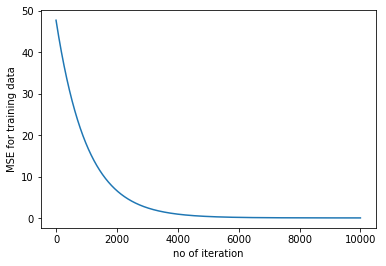

In [17]:
plt.plot(MSE_traindata)
plt.xlabel("no of iteration")
plt.ylabel("MSE for training data")
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig2#1#1.png')

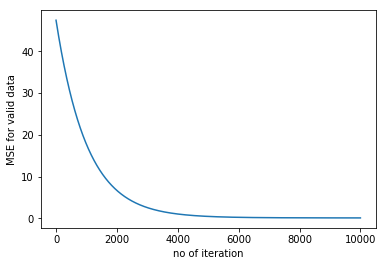

In [18]:
plt.plot(MSE_validdata)
plt.xlabel("no of iteration")
plt.ylabel("MSE for valid data")
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig2#1#2.png')

In [28]:
MSE_validdata

array([26.51357892, 26.48782968, 26.46210593, ...,  0.32052356,
        0.32050738,  0.3204912 ])